<a href="https://colab.research.google.com/github/rosipapa/colab/blob/main/benford_law_chi_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: KAGGLE - WORLD POPULATION

https://www.kaggle.com/datasets/d893bc6eb4370c2fd7b87bcf41972963b607202a1683f576700c52e6ecd4ab2a?resource=download



Benford's Law is a statistical principle that states that in many naturally occurring datasets, the first digit is likely to be a small number (such as 1 or 2) rather than a larger number (such as 7 or 9). This law can be applied in a variety of fields, including accounting, finance, and fraud detection. For example, in a company, a business stakeholder could use Benford's Law to analyze sales data and look for discrepancies that may indicate fraudulent activity. In simple terms, it is a way to check for abnormal distribution of numbers in a dataset.

In [4]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/world_population.csv",delimiter=",",header=0, index_col=0, parse_dates=True, squeeze=True)
df

<ipython-input-50-f955146a2c67>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/world_population.csv",delimiter=",",header=0, index_col=0, parse_dates=True, squeeze=True)


,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,,,,,,,,,,,,,,,,
36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42


In [51]:
df['2022 Population']

Rank
36     41128771
138     2842321
34     44903225
213       44273
203       79824
         ...   
226       11572
172      575986
46     33696614
63     20017675
74     16320537
Name: 2022 Population, Length: 234, dtype: int64


First Digit Chi-square Statistic: 0.037291822323955164
First Digit P-Value: 0.9999999950381119

At 0.05 significance level:
The distribution of the first digit follows Benford's Law.


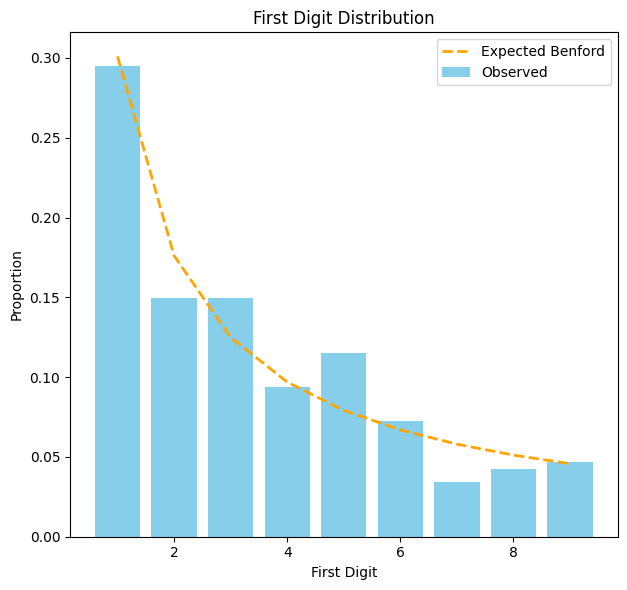

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Extract the first and second digits
df['First_Digit'] = df['2022 Population'].astype(str).str[0].astype(int)

# Count occurrences of first digits
first_digit_counts = df['First_Digit'].value_counts().sort_index()

# Expected Benford's Law values for first and second digits
expected_benford = np.log10(1 + 1/np.arange(1, 10))

# Plotting the graphics
plt.figure(figsize=(12, 6))

# Plot for First Digit
plt.subplot(1, 2, 1)
plt.bar(first_digit_counts.index, first_digit_counts / len(df), color='skyblue', label='Observed')
plt.plot(range(1, 10), expected_benford, color='orange', linestyle='--', linewidth=2, label='Expected Benford')
plt.title('First Digit Distribution')
plt.xlabel('First Digit')
plt.ylabel('Proportion')
plt.legend()

# Statistical Test for adherence to Benford's Law (Chi-square test)
# The Chi-square Statistic measures the deviation between observed and expected
# distributions, assessing adherence to Benford's Law.
# The p-value tells us the likelihood of getting a result (chi-square statistic)
# as unusual as what we observed, or even more extreme.
# A low p-value indicates significant deviation, suggesting a departure from the law.
# The Chi-square Test for Benford's Law determines statistical consistency,
# with a p-value below 0.05 implying a rejection of conformity to Benford's Law.
chi2_stat_first, p_value_first = chisquare(first_digit_counts / len(df), f_exp=expected_benford)

# Significance level (alpha)
alpha = 0.05

# Conclusion
conclusion_first = "follows" if p_value_first > alpha else "does not follow"

# Print information
print(f"\nFirst Digit Chi-square Statistic: {chi2_stat_first}")
print(f"First Digit P-Value: {p_value_first}")


# Print Conclusion
print(f"\nAt {alpha} significance level:")
print(f"The distribution of the first digit {conclusion_first} Benford's Law.")

plt.tight_layout()
plt.show()
